<a href="https://colab.research.google.com/github/pkro/tensorflow_cert_training/blob/main/colab_notebooks/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Regression with neural networks in TensorFlow

Regression problem: predicting a numerical variable based on some other variation of variables

In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.2


### Create data to view and fit

- features are usually defined in uppercase `X`, labels in lowercase `y`

Here we create a simple feature and label lists where the relationship is y (label) = feature (Y) + 10

Input shape: [8,] (8 numbers)
Output shape: [1,] (one number)

*Much easier way than the way I did it further down below:*

```
X = tf.range(-7, 15, 3)
y = X + 10
```

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# create features
# x = np.array([-7., -4., -1., 2, 5., 8., 11., 14.])
X = np.array(range(-7, 15, 3))
X

array([-7, -4, -1,  2,  5,  8, 11, 14])

In [4]:
# Create labels
y = np.array(range(3,25, 3)).astype(float)
y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

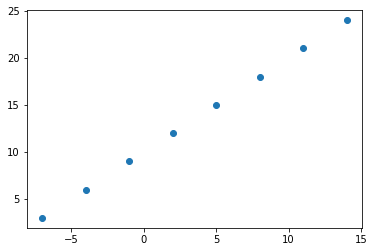

In [5]:
# Visualize
plt.scatter(X,y)

In [6]:
# this is the rule we want the neural network to learn
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

Create a demo tensor for house pricing prediction problem (see main readme), where we already know the input / output shape from the info graphic and try to deduce the shapes for our X, y arrays.

In [7]:
house_info = tf.constant([3, 2, 1]) # 3 bedrooms, 2 bathrooms, 1 garage
house_price = tf.constant([939700])

house_info, house_price


(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 2, 1], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

The house info contains just one item of shape 3, our `X` contains 8 of shape 1 (just one number), as does the desired output.

So the input shape is 1, as is the output shape for our simple example (that we have 8 items in those arrays doesn't matter for the input / output shape!)


In [8]:
print(X[0], "should predict", y[0])
print(X[1], "should predict", y[1])
print("etc...")

-7 should predict 3.0
-4 should predict 6.0
etc...


In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape, X[0].ndim

((), (), 0)

Why is there no shape?

Scalars (single numbers) are a rank 0 tensor (0 dimensions).

In the following code, we need to expand the dimensions of the input vector when fitting a model (automatic in TensorFlow up to 2.6, manual from 2.7 onward) to avoid a `shape error`:

```
## OLD
# Fit the model
model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
 
## New
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated 
```

In [10]:
# turn arrays into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape, X[0].ndim

(TensorShape([]), TensorShape([]), 0)

### Steps in modelling with TensorFlow

1. Creationg a model - define the input and output layers, as well as the hidden layers of a deep learning model
2. Compiling a model
  - define the loss function (the function which tells the model how wrong it is) 
  - the optimizer (tells the model how to improve the patterns it is learning) 
  -evaluation metrics (what we can use to interpret the performance of the model)
3. Fitting a model - let the model try to find patterns between X and y (features and labels)

![steps in modeling with tensorflow](https://github.com/pkro/tensorflow_cert_training/blob/main/readme_images/tensorflow_modeling_steps.png?raw=1)

In [12]:
tf.random.set_seed(42)

# 1. Create a model using the sequential API
# layers can also be added with 
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1)) 
# instead of passing them as an array
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # "1" because we want to predict 1 number
])


# 2. compile the model 
model.compile(
    # or .mean_absolute_error, Computes the mean absolute error between labels and predictions.
    # loss = mean(abs(y_true - y_pred), axis=-1)
    # where y_true is the correct value, y_pred the prediction the model makes
    # "on average, how wrong were our predictions"
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(), # stochastic gradient descent;
    metrics=["mae"] # most functions can be passed as string, e.g. optimizer="sgd"
  )

# 3. Fit the model
# Sequential groups a linear stack of layers into a tf.keras.Model.
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # 5 "laps"



Epoch 1/5
1/1 [==============================] - 1s 787ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [13]:
print(X, y)
model.predict([17.]) # SHOULD be 27.0

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float32) tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float32)
1/1 [==============================] - 0s 233ms/step


array([[12.716021]], dtype=float32)

That's a pretty bad prediction.

### Improving a model with Tensorflow

We can try to improve a model on each of the 5 steps. The best would be to have more training data.

1. **Creating a model** - add more layers, increase number of hidden units (aka neurons) within each layer, change the [activation function](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/) of each layer.
2. **Compiling a model** - change optimization function or **learning rate** of the optimization function
3. **Fitting the model** - more epochs, give more data


Do small singular changes in experiments to see what causes a model to perform better (or *worse*!)

**Common ways to improve a deep model:**

- Adding layers
- Increase the number of hidden units (neurons)
- Change the activation functions
- Change the optimization function
- Change the learning rate; **this is potentially the most important hyperparameter to change**
- Fitting on more data (if available)
- Fitting for longer (easiest, just add more epochs)


#### More epochs

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
  )

# 100 epochs instead of 5 - loss goes down
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0) # more epochs (skip output)

In [15]:
model.predict([17.])

1/1 [==============================] - 0s 82ms/step


array([[29.739855]], dtype=float32)

The prediction has improved significantly already

#### Add a layer / hidden units / activation function

In [16]:
# reminder of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# add more layers, more neurons and an activation
model = tf.keras.Sequential([
    # add another layer, more hidden units and change the activation function
    # we can change each of these separately
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = "mae", # just an alternative way to define the loss function
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
  )

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [18]:
model.predict([17.])

1/1 [==============================] - 0s 88ms/step


array([[32.7789]], dtype=float32)

The prediction actually got worse, even though the loss got lower (change verbose to 'auto' in model.fit to see steps).

This is called [**overfitting**](https://www.ibm.com/topics/overfitting), meaning the model learns the training data *too* well. In other words, the lower loss we see isn't representative to data the model hasn't seen before.

#### Change optimizer and **learning rate**

In [19]:
# we keep the changes from before
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = "mae",
    # Adam is a common and useful optimizer, often the default
    # the higher the learning rate, the quicker the optimizer pushes
    # the model to improve
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
  )

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0) # loss goes down to 0.x in the last iterations

In [20]:
model.predict([17.]) # almost perfect fit

1/1 [==============================] - 0s 97ms/step


array([[26.921337]], dtype=float32)

### Evaluating a model

In practice, a typical workflow is:

Build a model -> fit it -> evaluate it -> tweak -> evaluate -> tweak -> ...

- Building models: experiment, experiment, experiment
- Evaluating models: **visualize, visualize, visualize**

Things to visualize:

- The data - what are we working with? What does it look like?
- The model - what does our model look like?
- The training of a model - how does a model perform while it learns?
- The predictions - how do the predictions of the model line up against the ground truth (the original labels)?


In [21]:
# Make a bigger dataset (in practice rarely available)
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

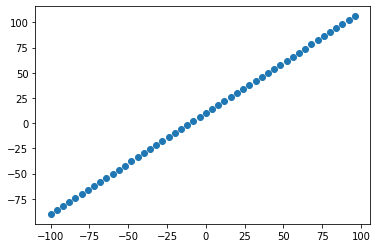

In [23]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

#### Digression: The 3 sets...

- **Training set** (what the model learns from); typically 70%-80% of availiable data (analogy: course materials)
- Validation set - what the model is tuned on; typically 10%-15% (analogy: practice exam)
- **Test set** - the model gets evaluated on this data to test what it has learned, typically 10%-15% (analogy: final exam)

Validation set is optional (tuning / testing can be done on one set).

Goal: **Generalization** of the model - make the model perform well on data it hasn't seen before



In [24]:
# Check the length of samples
len(X)

50

In [25]:
# split into training and test sets from available data
X_train = X[:40] # 80%
X_test = X[40:] # 209%
y_train = y[:40]
y_test = y[40:]
X_train, y_train, X_test, y_test, len(X_train), len(X_test)

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 40,
 10)

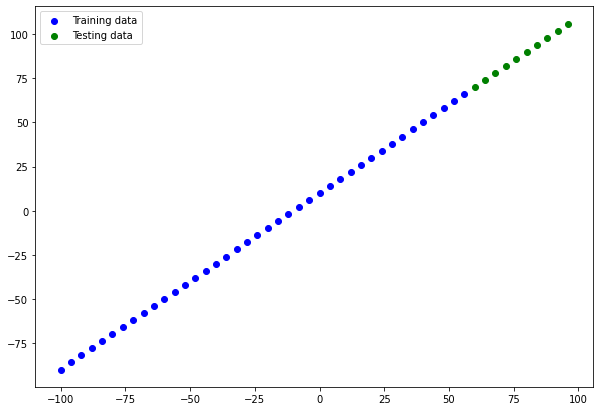

In [26]:
# Visualize the test / training data again
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="blue", label="Training data")
plt.scatter(X_test, y_test, c="green", label="Testing data")
plt.legend();

### Visualize the model

In [27]:
# create a model again (simple model from the start)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
  )

# No fitting for now to show how to use model.build
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [28]:
try:
  model.summary()
except ValueError as err:
  print(err)

This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.


In [29]:
# Create a model which builds automatically by defining the input_shape
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]) # shape = 1 because we pass just one number
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


The numbers in the model and layer names just denotes an identifier for the models / layers created in the session, if none given with a "name" parameter.

- **Dense** = **Fully connected** = **linear layer** = every input neuron is connected to every output neuron
- Output shape is = number of hidden units (?)
- Total params: total number of parameters in the model (how many patterns the model is going to try and learn)
- Trainable params: parameters / patterns the model can update as it trains
- Non-trainable params: frozen patterns in existing models; aren't updated during training. Typicdal when bringing n already learned patterns / parameters during **transfer learning**.

**Resource:** 

http://introtodeeplearning.com/ (from january 2023 on)

http://introtodeeplearning.com/2022/index.html

- **Exercise:** tryp playing around with the nubmer of hidden units and see how it affects the number of parameters.
  - seems like the output shape = number of hidden layers (and not the defined output shape)
  - parameters are 2 * num of hidden layers; 2 is probably the input -> output (one X for one y); **2 trainable parameters per dense hidden unit**

In [30]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


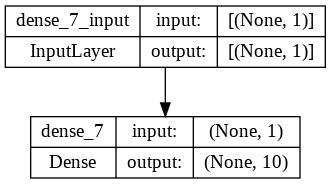

In [32]:
# visualize model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

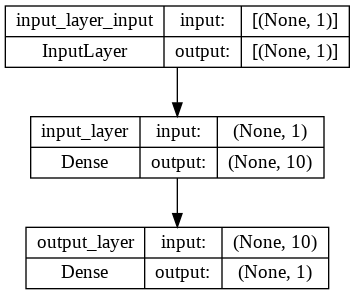

In [33]:
# Add layers / neuros to check how output changes
# Also, name layers and the model itself for easier reading
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, input_shape=[1], name="output_layer"),
], name="two_layer_model")

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)


plot_model(model, show_shapes=True)

In [34]:
model.summary()

Model: "two_layer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Visualizing the models predictions

To visualize predictions, it's a good idea to plot them agains the ground truth labels.

In practice these are often named `y_test` (like here), `y_true` vs `y_pred`

In [35]:
# define a reusable plot function
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="blue", label="Training data")
  plt.scatter(test_data, test_labels, c="green", label="Testing data") # true values
  plt.scatter(test_data, predictions, c="red", label="Predictions") # predictions
  plt.legend()

In [36]:
# create model and fit it to be in sync with the course videos
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X_train, y_train, epochs=50, verbose=0)

1/1 [==============================] - 0s 16ms/step


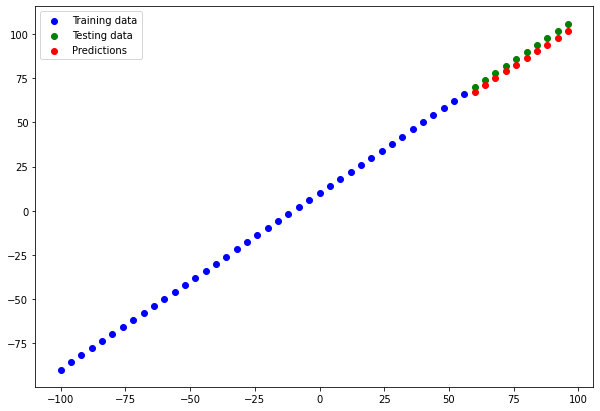

In [44]:
# check / visualize predictions of test data
y_pred=model.predict(y_test)
plot_predictions(train_data=X_train, 
                 train_labels=y_train, 
                 test_data=X_test, 
                 test_labels=y_test, 
                 predictions=y_pred)
# model.predict([17.]) 

### Evaluating predictions with regression evaluation metrics

Depending on the problem, there are different evaluation metrix for the models evaluation.

Regression problems have two main metrics:

- MAE: mean absolute error, "on average, how wrong is each of my models predictions"
- MSE: mean square error, "square the average errors"


![regression metrics](https://github.com/pkro/tensorflow_cert_training/blob/main/readme_images/regression_metrics.png?raw=1)


- Σ = sum of
- |value| = absolute value
- ŷ = y_pred = the predictions

In [42]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 286ms/step - loss: 12.9609 - mae: 12.9609


[12.9609375, 12.9609375]

In [39]:
y_pred

array([[ 67.408585],
       [ 71.22382 ],
       [ 75.03906 ],
       [ 78.8543  ],
       [ 82.66955 ],
       [ 86.48479 ],
       [ 90.300026],
       [ 94.115265],
       [ 97.930504],
       [101.74574 ]], dtype=float32)

In [40]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 67.408585,  71.22382 ,  75.03906 ,  78.8543  ,  82.66955 ,
        86.48479 ,  90.300026,  94.115265,  97.930504, 101.74574 ],
      dtype=float32)>

In [41]:
# calculate the mean absolute error

# y_pred has an extra dimension for some reason, so we make it 1-dimensional using
# tf.squeeze

# 1. by hand
y_pred_onedim = tf.squeeze(y_pred);
y_test_float = tf.cast(y_test, dtype="float")

mae = np.sum(np.abs(y_test_float - y_pred)) / len(y_pred_onedim)
print("hand: ", mae)

# 2. using tensorflow
# print(tf.keras.losses.MAE(y_test, y_pred_onedim))# same
print(tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred)))

hand:  3.4228355407714846
tf.Tensor(3.4228356, shape=(), dtype=float32)


In [49]:
# Calculate mean squared error

# 1. by hand
mse = 1/len(y_pred_onedim) * np.sum((y_test_float - y_pred_onedim)**2)
print("hand: ", mse)

# 2. using tensorflow
print(tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred)))

hand:  11.997427368164063
tf.Tensor(11.997427, shape=(), dtype=float32)


In [54]:
# some functions for later use
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_test, 
                                        tf.squeeze(y_pred) if y_pred.ndim > y_true.ndim else y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_test, 
                                        tf.squeeze(y_pred) if y_pred.ndim > y_true.ndim else y_pred)

In [56]:
print(mae(y_test, y_pred))

tf.Tensor(3.4228356, shape=(), dtype=float32)


In [ ]:
### Setting up TensorFlow modeling experiments

In [ ]:
#### Start with a simple model

In [ ]:
#### Increasing complexity